In [1]:
import os
import glob
from tensorflow.python.summary.summary_iterator import summary_iterator

import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import shuffle,resample
from sklearn.linear_model import Ridge


from time import time

%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns


In [3]:
sns.set(font_scale=1.5)
sns.set_style("white")


In [4]:

l_mse  = []
l_reg  = []
l_loss = []
l_IRC = []
l_IRCada = []
l_PoV = []
l_cnum = []
l_cnum_GT = []

for i,value in enumerate(summary_iterator(glob.glob('*.neptune')[0])):
    try:
        if value.summary.value[0].tag=="3_Training/mse":
            l_mse.append([value.step,value.summary.value[0].simple_value])
        if value.summary.value[0].tag=="3_Training/reg":
            l_reg.append([value.step,value.summary.value[0].simple_value])
        if value.summary.value[0].tag=="3_Training/loss":
            l_loss.append([value.step,value.summary.value[0].simple_value])
        
        if value.summary.value[0].tag=="7_IRC/IRC":
            l_IRC.append([value.step,value.summary.value[0].simple_value])
        if value.summary.value[0].tag=="7_IRC/IRC_Adaptive":
            l_IRCada.append([value.step,value.summary.value[0].simple_value])
         
        if value.summary.value[0].tag=="7_IRC/PoV":
            l_PoV.append([value.step,value.summary.value[0].simple_value])
       
            
        if value.summary.value[0].tag=="7_IRC/cond_num_adaptive":
            l_cnum.append([value.step,value.summary.value[0].simple_value])
            

        if value.summary.value[0].tag=="7_IRC/cond_num_adaptive_GT":
            l_cnum_GT.append([value.step,value.summary.value[0].simple_value])

            
        if i<3:
            print(value)
    except:
        print('no')

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
no
wall_time: 1631266529.692997
summary {
  value {
    tag: "3_Training/loss"
    simple_value: 0.2722693085670471
  }
}

wall_time: 1631266530.0439012
summary {
  value {
    tag: "3_Training/mse"
    simple_value: 0.24307982623577118
  }
}



In [5]:
l_mse_test  = []

for i,value in enumerate(summary_iterator(glob.glob('4_Test/mse_test/1/*.neptune')[0])):
    try:
        if value.summary.value[0].tag=='4_Test/mse_test':
            l_mse_test.append([value.step,value.summary.value[0].simple_value])             
    except:
        print('no')

no


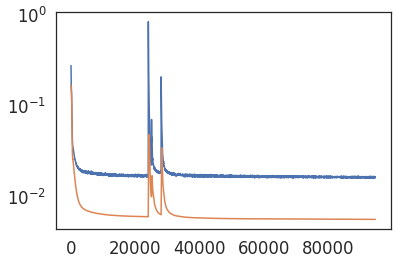

In [6]:
plt.plot(np.array(l_loss)[:,0],np.array(l_loss)[:,1])
plt.plot(np.array(l_mse_test)[:,0],np.array(l_mse_test)[:,1])
plt.yscale('log')

In [7]:
l_mse_test[-1]

[94775, 0.005506409332156181]